In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix

In [2]:
# Load the loan approval dataset
loan_df = pd.read_csv("loan_approval_data.csv")

In [3]:
# Drop unique identifier as it does not contribute to prediction
loan_df.drop(columns=['Applicant_ID'], axis=1)

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,9092.0,Salaried,58.0,Married,0.0,557.0,0.0,0.59,5370.0,43563.0,8311.0,72.0,Personal,NaN,Not Graduate,Male,Unemployed,No
996,3279.0,6356.0,Self-employed,58.0,Married,1.0,646.0,3.0,0.19,NaN,18361.0,22563.0,12.0,Business,Urban,Graduate,Female,Government,No
997,15192.0,8433.0,Contract,48.0,Single,1.0,666.0,1.0,0.40,8581.0,41335.0,16203.0,24.0,Home,Rural,Graduate,Male,MNC,No
998,9083.0,7380.0,Unemployed,50.0,Single,1.0,748.0,3.0,0.31,13491.0,8933.0,10290.0,36.0,Personal,Urban,Graduate,Male,Private,Yes


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [5]:
# Check for missing (null) values in each column
# This helps identify whether imputation or row removal is required
loan_df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [6]:
# Identify numerical columns (float type) to handle missing values
# separately using appropriate numerical imputation strategies
num_mis_val = loan_df.select_dtypes(include=['float64']).columns

# Identify categorical columns (object type) for separate
# categorical missing value treatment (e.g., mode imputation)
cat_mis_val = loan_df.select_dtypes(include=['object']).columns

In [7]:
num_mis_val

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [8]:
cat_mis_val

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [9]:
num_mis_val.size + cat_mis_val.size

20

In [10]:
# i learnt this new method of filling the missing value

# Handle missing values using SimpleImputer
# Numerical features are imputed with the mean to preserve overall distribution
from sklearn.impute import SimpleImputer

# Impute missing values in numerical columns
num_imp = SimpleImputer(strategy='mean')
loan_df[num_mis_val] = num_imp.fit_transform(loan_df[num_mis_val])

# Impute missing values in categorical columns
# Most frequent value (mode) is used to retain category consistency
cat_imp = SimpleImputer(strategy='most_frequent')
loan_df[cat_mis_val] = cat_imp.fit_transform(loan_df[cat_mis_val])


In [11]:
loan_df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [12]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        1000 non-null   float64
 1   Applicant_Income    1000 non-null   float64
 2   Coapplicant_Income  1000 non-null   float64
 3   Employment_Status   1000 non-null   object 
 4   Age                 1000 non-null   float64
 5   Marital_Status      1000 non-null   object 
 6   Dependents          1000 non-null   float64
 7   Credit_Score        1000 non-null   float64
 8   Existing_Loans      1000 non-null   float64
 9   DTI_Ratio           1000 non-null   float64
 10  Savings             1000 non-null   float64
 11  Collateral_Value    1000 non-null   float64
 12  Loan_Amount         1000 non-null   float64
 13  Loan_Term           1000 non-null   float64
 14  Loan_Purpose        1000 non-null   object 
 15  Property_Area       1000 non-null   object 
 16  Educati

# EDA- Exploratory Data Analysis


Text(0.5, 1.0, 'Loan Approved')

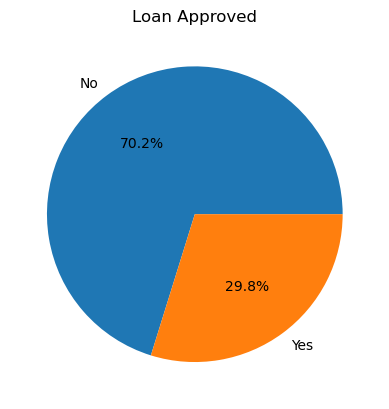

In [13]:
# knowing how balanced our classes are?
class_cont=loan_df['Loan_Approved'].value_counts()
plt.pie(
    class_cont,labels=['No','Yes'],autopct='%1.1f%%'
)
plt.title('Loan Approved')

<Axes: xlabel='Applicant_Income', ylabel='Count'>

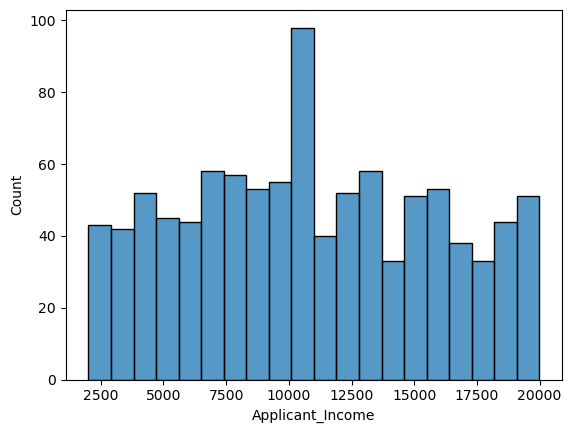

In [14]:
# analyze income
sns.histplot(
    data= loan_df,
    x='Applicant_Income',
    bins=20
)

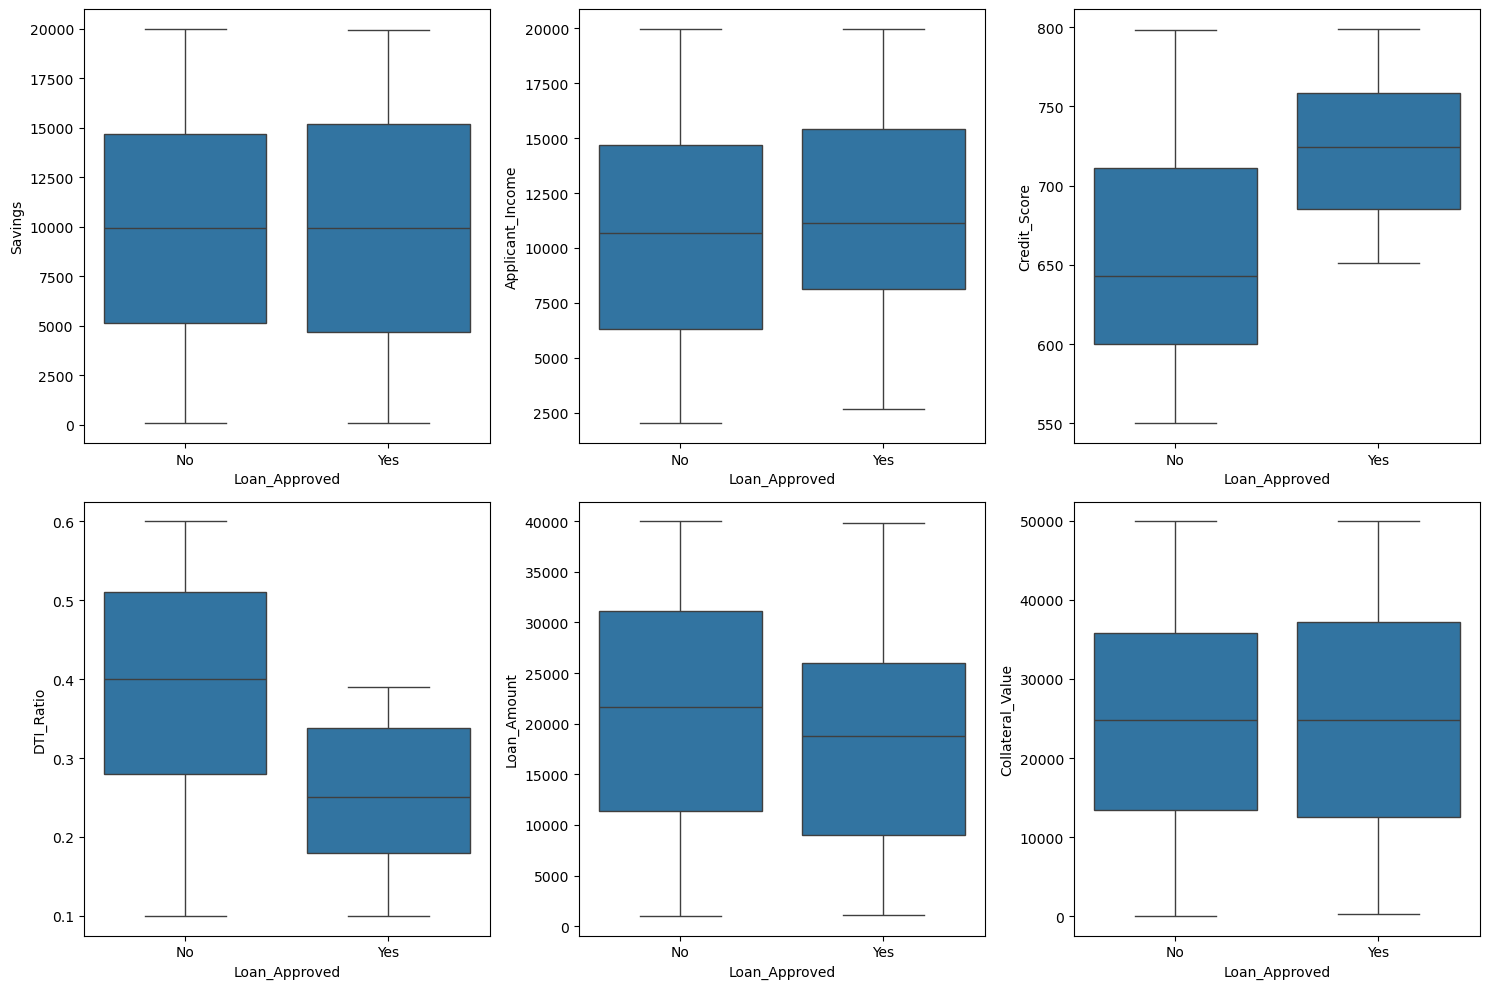

In [15]:
# outliers detection
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=loan_df, x='Loan_Approved', y='Savings')
sns.boxplot(ax=axes[0, 1], data=loan_df, x='Loan_Approved', y='Applicant_Income')
sns.boxplot(ax=axes[0, 2], data=loan_df, x='Loan_Approved', y='Credit_Score')

sns.boxplot(ax=axes[1, 0], data=loan_df, x='Loan_Approved', y='DTI_Ratio')
sns.boxplot(ax=axes[1, 1], data=loan_df, x='Loan_Approved', y='Loan_Amount')
sns.boxplot(ax=axes[1, 2], data=loan_df, x='Loan_Approved', y='Collateral_Value')

plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

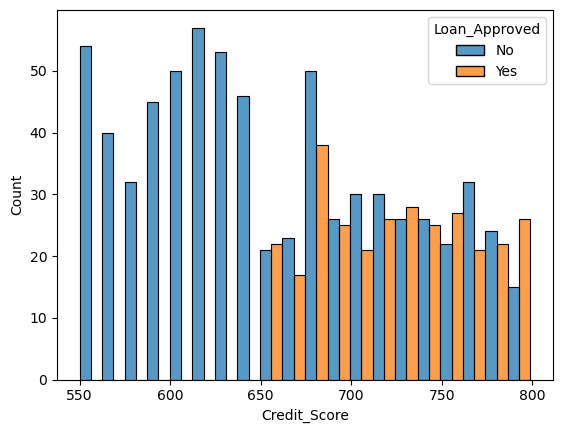

In [16]:
# Credit Score with loan approved 
sns.histplot(
    data=loan_df,
    x='Credit_Score',
    hue='Loan_Approved',
    bins=20,
    multiple='dodge'
)

# Feature Encoding

In [17]:
# Encode categorical variables into numerical form using LabelEncoder
# This is required as machine learning models cannot work with string values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # new thing

le = LabelEncoder()

# Encode Education_Level (ordinal/binary categorical feature)
loan_df['Education_Level'] = le.fit_transform(loan_df['Education_Level'])

# Encode target variable (Loan_Approved) into binary numerical labels
# This enables supervised learning model training
loan_df['Loan_Approved'] = le.fit_transform(loan_df['Loan_Approved'])


In [18]:
loan_df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [19]:
# Apply One-Hot Encoding to nominal categorical features
# OneHotEncoder is preferred here to avoid introducing
# artificial ordinal relationships between categories
from sklearn.preprocessing import OneHotEncoder

# List of categorical columns to be one-hot encoded
col = [
    'Employment_Status',
    'Marital_Status',
    'Loan_Purpose',
    'Property_Area',
    'Gender',
    'Employer_Category'
]

# Initialize OneHotEncoder
# - drop='first' helps reduce multicollinearity (dummy variable trap)
# - sparse_output=False returns a dense NumPy array
# - handle_unknown='ignore' ensures robustness during inference
ohe = OneHotEncoder(
    drop='first',
    sparse_output=False,
    handle_unknown='ignore'
)

# Fit encoder on categorical features and transform them
encoded = ohe.fit_transform(loan_df[col])

In [20]:
# Convert encoded NumPy array into a DataFrame with meaningful column names
encoded_df = pd.DataFrame(
    encoded,
    columns=ohe.get_feature_names_out(col),
    index=loan_df.index
)

# Drop original categorical columns and concatenate encoded features
# to form the final preprocessed dataset
loan_df = pd.concat(
    [loan_df.drop(columns=col), encoded_df],
    axis=1
)

In [21]:
loan_df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3.0,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4.0,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


# correlation heatmaps ( new thing learnt)


In [22]:
# Select only numerical columns for correlation analysis
num_cols = loan_df.select_dtypes(include='number')

# Compute correlation matrix to understand linear relationships
# between numerical features
corr_matrix = num_cols.corr()

<Axes: >

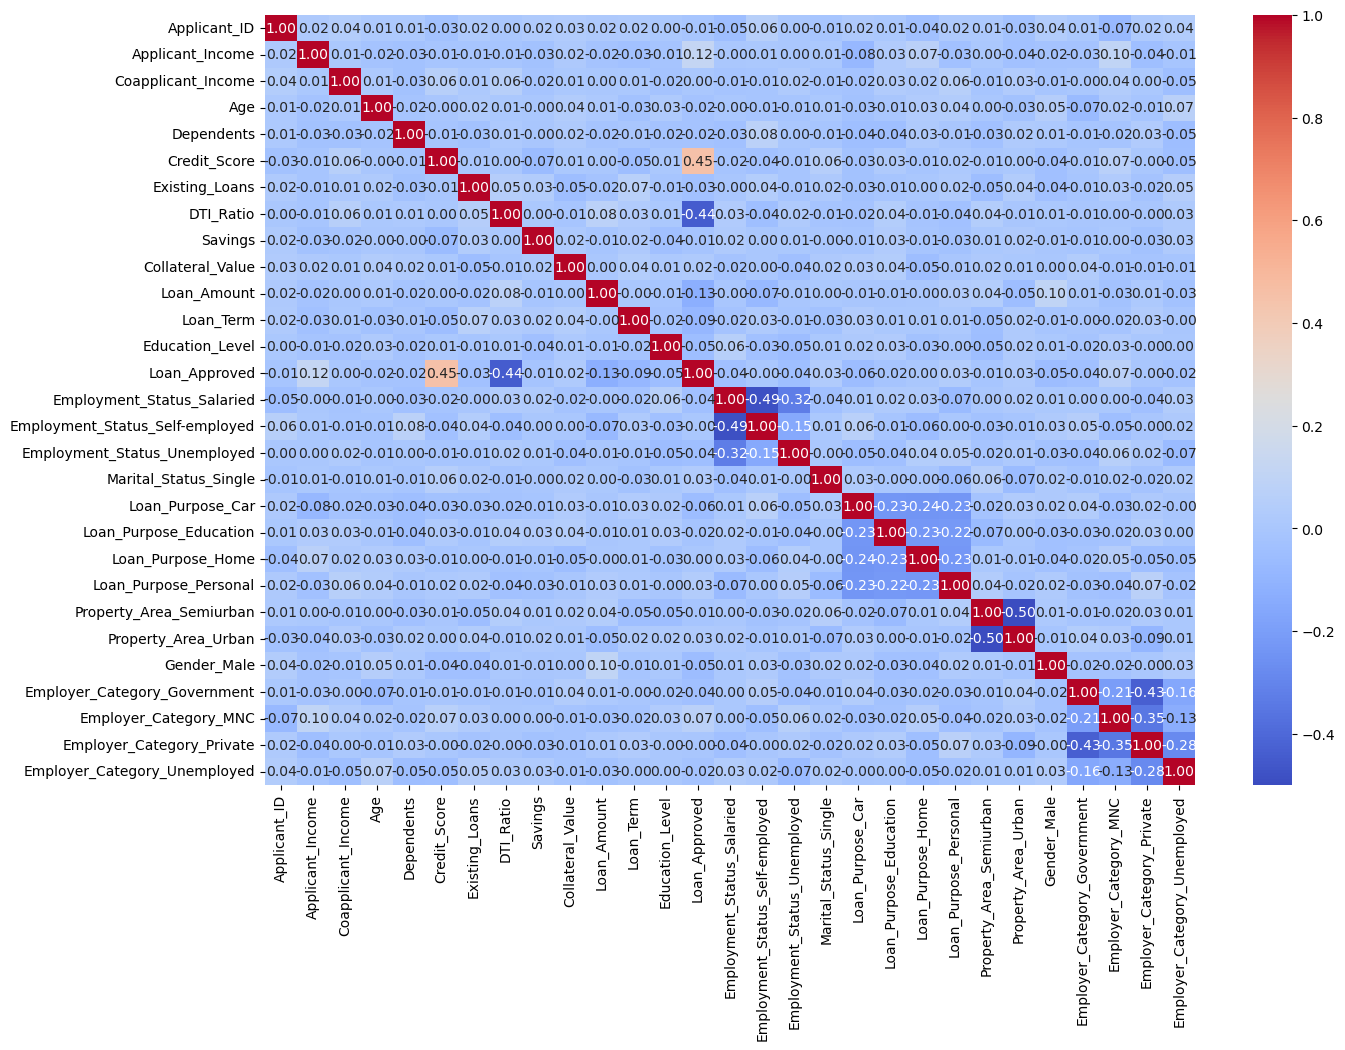

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(
    corr_matrix,
    annot= True,
    cmap = 'coolwarm',
    fmt='.2f'
)

# Train-Test-split + Feature Scalling

In [24]:
# Separate input features (X) and target variable (y)
# Loan_Approved is the label we want the model to predict
X = loan_df.drop(columns=['Loan_Approved'],axis=1)
y = loan_df['Loan_Approved']

# Split data into training and testing sets
# Test size of 20% ensures fair evaluation on unseen data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
y_train.head()

29     0
535    0
695    0
557    0
836    1
Name: Loan_Approved, dtype: int64

In [26]:
# Initialize StandardScaler to normalize feature values
scaler = StandardScaler()

# Fit scaler ONLY on training data to learn scaling parameters
# This prevents data leakage from the test set
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation to test data
X_test_scaled = scaler.transform(X_test)

# Train & Evaluate models

In [27]:
# Logistic Regression
# Initialize Logistic Regression classifier
log_model = LogisticRegression()

# Train the model using scaled training data
log_model.fit(X_train_scaled, y_train)

# Generate predictions on scaled test data
y_pred = log_model.predict(X_test_scaled)

# Evaluation metrics to assess model performance
# Multiple metrics are used to avoid relying only on accuracy
print("Evaluation For Logistic Regression")
print('Precision:', precision_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('cm:', confusion_matrix(y_test, y_pred))

Evaluation For Logistic Regression
Precision: 0.7868852459016393
Accuracy: 0.87
Recall: 0.7868852459016393
F1: 0.7868852459016393
cm: [[126  13]
 [ 13  48]]


In [28]:
# KNN Model

# Initialize K-Nearest Neighbors classifier
# n_neighbors=9 defines the number of nearest points used for prediction
knn_model = KNeighborsClassifier(n_neighbors=9)

# Train the KNN model on scaled training data
knn_model.fit(X_train_scaled, y_train)

# Generate predictions on scaled test data
y_pred = knn_model.predict(X_test_scaled)

# Evaluation metrics to assess KNN model performance
print("Evaluation For kNN")
print('Precision:', precision_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('cm:', confusion_matrix(y_test, y_pred))

Evaluation For kNN
Precision: 0.6222222222222222
Accuracy: 0.75
Recall: 0.45901639344262296
F1: 0.5283018867924528
cm: [[122  17]
 [ 33  28]]


In [29]:
# Initialize Gaussian Naive Bayes classifier
# Suitable for continuous features assuming normal distribution
gb_model = GaussianNB()

# Train the Naive Bayes model on scaled training data
gb_model.fit(X_train_scaled, y_train)

# Generate predictions on scaled test data
y_pred = gb_model.predict(X_test_scaled)

# Evaluation metrics to assess Naive Bayes model performance
print("Evaluation For Naive Bayes")
print('Precision:', precision_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('cm:', confusion_matrix(y_test, y_pred))

Evaluation For Naive Bayes
Precision: 0.8035714285714286
Accuracy: 0.865
Recall: 0.7377049180327869
F1: 0.7692307692307693
cm: [[128  11]
 [ 16  45]]


### Best Model based On Precision = > Naive Bayes

# Feature Engineering To improve model

In [30]:
# feature engineering doesn't effect model too much so that's why its not that much helpful  

### Final Model Selection

Multiple machine learning models were trained and evaluated, including
Logistic Regression, KNN, and Naive Bayes.

Based on comparative performance across accuracy, precision, recall,
and F1-score, Naive Bayes demonstrated the most consistent results
and was selected as the final model for deployment.
